In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
np.random.seed(0)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [3]:
#This is my test to verify I can read API one single city and to become familiar with json file.
url= f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q=sao filipe"
response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))
print(response['main']['temp'])
print(response['main']['humidity'])
print(response['clouds']['all'])
print(response['wind']['speed'])

{
    "base": "stations",
    "clouds": {
        "all": 29
    },
    "cod": 200,
    "coord": {
        "lat": 14.9,
        "lon": -24.5
    },
    "dt": 1599440465,
    "id": 3374210,
    "main": {
        "feels_like": 77.09,
        "grnd_level": 1003,
        "humidity": 81,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 78.24,
        "temp_max": 78.24,
        "temp_min": 78.24
    },
    "name": "S\u00e3o Filipe",
    "sys": {
        "country": "CV",
        "sunrise": 1599463581,
        "sunset": 1599507949
    },
    "timezone": -3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 359,
        "speed": 17.36
    }
}
78.24
81
29
17.36


#Perform API Calls

#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

In [6]:
# Make a request for each of the indices
base_url= "http://api.openweathermap.org/data/2.5/weather?"
unit_temp="imperial"
name = []
lati = []
long = []
temp = []
maxtemps = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

# Initialize count variables for record and set
item = 1
grupo = 1

for city in cities:
    
    try:
        print(f"Processing Record {item} of Group {grupo} ... {city}")  
        data= requests.get(f"{base_url}appid={weather_api_key}&units={unit_temp}&q={city}").json()
        name.append(data["name"])
        country.append(data["sys"]["country"])
        lati.append(data["coord"]["lat"])
        long.append(data["coord"]["lon"])    
        temp.append(data["main"]["temp"])
        maxtemps.append(data["main"]["temp_max"])
        humidity.append(data["main"]["humidity"])
        cloudiness.append(data["clouds"]["all"])
        windspeed.append(data["wind"]["speed"])
        date.append(data["dt"])
        
        item += 1
        
        #If statement to limit API calls to 50
        if item > 50:
            grupo += 1
            item = 1
            time.sleep(1)
    
    except:
        print(f"Opps  '{city}' was not found.")

print("Finish retrieving cities data")

Processing Record 1 of Group 1 ... bubaque
Processing Record 2 of Group 1 ... lushunkou
Opps  'lushunkou' was not found.
Processing Record 2 of Group 1 ... arcelia
Processing Record 3 of Group 1 ... wenchi
Processing Record 4 of Group 1 ... samarai
Processing Record 5 of Group 1 ... iranshahr
Processing Record 6 of Group 1 ... kawalu
Processing Record 7 of Group 1 ... tromso
Processing Record 8 of Group 1 ... pevek
Processing Record 9 of Group 1 ... chiredzi
Processing Record 10 of Group 1 ... bethel
Processing Record 11 of Group 1 ... lazaro cardenas
Processing Record 12 of Group 1 ... sao filipe
Processing Record 13 of Group 1 ... tumannyy
Opps  'tumannyy' was not found.
Processing Record 13 of Group 1 ... albany
Processing Record 14 of Group 1 ... ushuaia
Processing Record 15 of Group 1 ... busselton
Processing Record 16 of Group 1 ... vanavara
Processing Record 17 of Group 1 ... sept-iles
Processing Record 18 of Group 1 ... komsomolskiy
Processing Record 19 of Group 1 ... belushya 

Processing Record 5 of Group 4 ... illoqqortoormiut
Opps  'illoqqortoormiut' was not found.
Processing Record 5 of Group 4 ... havre-saint-pierre
Processing Record 6 of Group 4 ... zhigansk
Processing Record 7 of Group 4 ... ostersund
Processing Record 8 of Group 4 ... upernavik
Processing Record 9 of Group 4 ... mendahara
Opps  'mendahara' was not found.
Processing Record 9 of Group 4 ... lompoc
Processing Record 10 of Group 4 ... port hedland
Processing Record 11 of Group 4 ... mogadishu
Processing Record 12 of Group 4 ... lulea
Processing Record 13 of Group 4 ... andenes
Processing Record 14 of Group 4 ... chapais
Processing Record 15 of Group 4 ... ahipara
Processing Record 16 of Group 4 ... hihifo
Opps  'hihifo' was not found.
Processing Record 16 of Group 4 ... comodoro rivadavia
Processing Record 17 of Group 4 ... kastoria
Processing Record 18 of Group 4 ... abay
Processing Record 19 of Group 4 ... anqing
Processing Record 20 of Group 4 ... onega
Processing Record 21 of Group 4 

Processing Record 14 of Group 7 ... petropavlovka
Processing Record 15 of Group 7 ... levokumskoye
Processing Record 16 of Group 7 ... fayaoue
Processing Record 17 of Group 7 ... emerald
Processing Record 18 of Group 7 ... kamwenge
Processing Record 19 of Group 7 ... tocopilla
Processing Record 20 of Group 7 ... doctor pedro p. pena
Opps  'doctor pedro p. pena' was not found.
Processing Record 20 of Group 7 ... burnie
Processing Record 21 of Group 7 ... ancud
Processing Record 22 of Group 7 ... mosquera
Processing Record 23 of Group 7 ... bodden town
Processing Record 24 of Group 7 ... thinadhoo
Processing Record 25 of Group 7 ... ruatoria
Opps  'ruatoria' was not found.
Processing Record 25 of Group 7 ... port blair
Processing Record 26 of Group 7 ... viedma
Processing Record 27 of Group 7 ... a
Opps  'a' was not found.
Processing Record 27 of Group 7 ... uige
Processing Record 28 of Group 7 ... mont-dore
Processing Record 29 of Group 7 ... attawapiskat
Opps  'attawapiskat' was not fo

Processing Record 20 of Group 10 ... ketchikan
Processing Record 21 of Group 10 ... san quintin
Processing Record 22 of Group 10 ... steinbach
Processing Record 23 of Group 10 ... solenzo
Processing Record 24 of Group 10 ... manzhouli
Processing Record 25 of Group 10 ... mali
Processing Record 26 of Group 10 ... la sierra
Processing Record 27 of Group 10 ... port-cartier
Processing Record 28 of Group 10 ... chaplynka
Processing Record 29 of Group 10 ... caxito
Processing Record 30 of Group 10 ... walvis bay
Processing Record 31 of Group 10 ... clyde river
Processing Record 32 of Group 10 ... galeana
Processing Record 33 of Group 10 ... nhulunbuy
Processing Record 34 of Group 10 ... macamic
Processing Record 35 of Group 10 ... camocim
Processing Record 36 of Group 10 ... belle fourche
Processing Record 37 of Group 10 ... toora-khem
Processing Record 38 of Group 10 ... nueve de julio
Processing Record 39 of Group 10 ... rey bouba
Processing Record 40 of Group 10 ... churapcha
Processing 

# Convert Raw Data to DataFrame

#Export the city data into a .csv.
#Display the DataFrame

In [7]:
#Create Dataframe
cities_df = pd.DataFrame({"City": name,
                          "Country": country,
                          "Date": date,
                          "Lat": lati,
        
                          "Lng": long,
                          "Current Temp": temp,
                          "Max Temp": maxtemps,
                          "Humidity (%)": humidity,
                          "Cloudiness (%)": cloudiness,
                          "Wind Speed (mph)": windspeed,
                                })


cities_df.to_csv("output/cities.csv", index=True, index_label="City ID", header=True)
cities_df.head()



,City,Country,Date,Lat,Lng,Current Temp,Max Temp,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Bubaque,GW,1599440492,11.28,-15.83,79.52,79.52,83,100,18.48
1,Arcelia,MX,1599440493,18.28,-100.27,74.88,74.88,86,100,0.60
2,Wankyi,GH,1599440493,7.74,-2.10,69.84,69.84,97,100,4.88
3,Samarai,PG,1599440493,-10.62,150.67,78.80,78.80,86,97,17.09
4,Iranshahr,IR,1599440494,27.20,60.68,80.60,80.60,13,0,4.52


 Inspect the data and remove the cities where the humidity > 100%.

Skip this step if there are no cities that have humidity > 100%.

In [8]:
#Cities that have humidity over 100%
humidity_over_100 = cities_df.loc[cities_df["Humidity (%)"] > 100, :]
humidity_over_100

,City,Country,Date,Lat,Lng,Current Temp,Max Temp,Humidity (%),Cloudiness (%),Wind Speed (mph)


There are no cities with Humidity over 100%


 Plotting the Data
 Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

Your first requirement is to create a series of scatter plots to showcase the following relationships:
•	Temperature (F) vs. Latitude
•	Humidity (%) vs. Latitude
•	Cloudiness (%) vs. Latitude
•	Wind Speed (mph) vs. Latitude
After each plot add a sentence or too explaining what the code is and analyzing.


C:\Users\ltorr\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


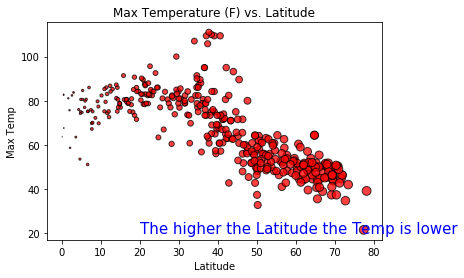

In [9]:
# Relatinship between Max Temperature (F) vs. Latitude
x_axis=cities_df.Lat
y_axis=cities_df['Max Temp']
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Max Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate("The higher the Latitude the Temp is lower",(20,20),fontsize=15,color="blue")
plt.savefig("../PNG_Images/Max Temperature (F) vs. Latitude.png")

plt.show()


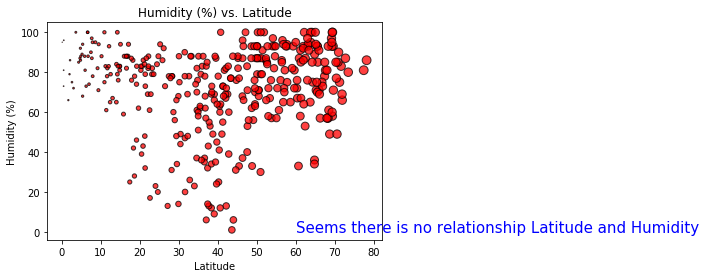

In [10]:
# Relationship between Humidity (%) vs. Latitude
x_axis=cities_df.Lat
y_axis=cities_df['Humidity (%)']
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate("Seems there is no relationship Latitude and Humidity",(60,0),fontsize=15,color="blue")
plt.savefig("../PNG_Images/Humidity (%) vs. Latitude.png")
plt.show()

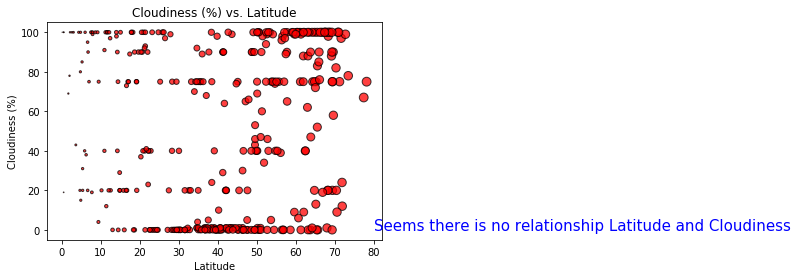

In [11]:
# Relationship between Cloudiness (%) vs. Latitude
x_axis=cities_df.Lat
y_axis=cities_df['Cloudiness (%)']
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate("Seems there is no relationship Latitude and Cloudiness ",(80,0),fontsize=15,color="blue")
plt.savefig("../PNG_Images/Cloudiness (%) vs. Latitude.png")
plt.show()

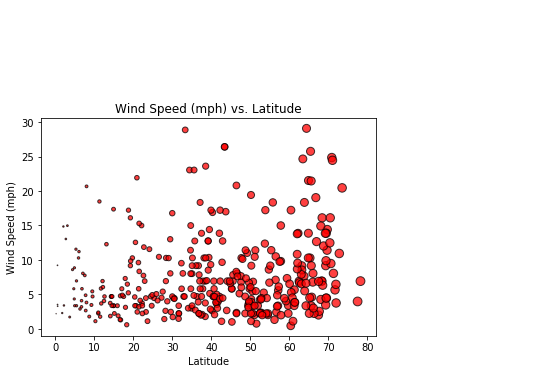

In [12]:
# Relationship between Wind Speed (mph) vs. Latitude
x_axis=cities_df.Lat
y_axis=cities_df['Wind Speed (mph)']
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate("Seems there is no relationship Latitude and Wind Speed (mph) ",(0,45),fontsize=15,color="blue")
plt.savefig("../PNG_Images/Wind Speed (mph) vs. Latitude.png")
plt.show()

In [13]:
Northern_Hemisphere = cities_df[cities_df['Lat'] > 0]
Southern_Hemisphere = cities_df[cities_df['Lat'] < 0]

In [14]:
#This is the function to to run linear regression on each relationship
def regresion(x_values,y_values,a,b):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    

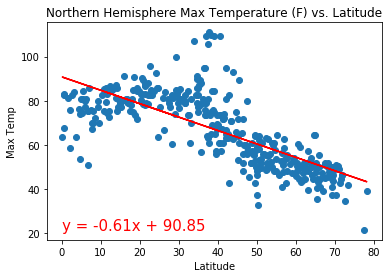

In [15]:
# Add the linear regression equation and line to plot

# Relatinship between Max Temperature (F) vs. Latitude
x_axis=Northern_Hemisphere.Lat
y_axis=Northern_Hemisphere['Max Temp']
plt.title("Northern Hemisphere Max Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

regresion(x_axis,y_axis,x_axis.min(),y_axis.min())
plt.savefig("../PNG_Images/Northern Hemisphere Max Temperature (F) vs. Latitude.png")
plt.show()



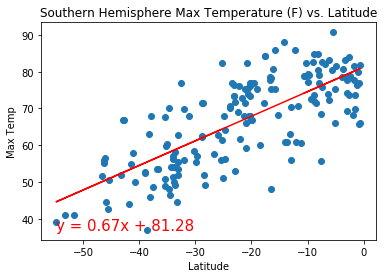

In [16]:

x_axis=Southern_Hemisphere.Lat
y_axis=Southern_Hemisphere['Max Temp']
plt.title("Southern Hemisphere Max Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

regresion(x_axis,y_axis,x_axis.min(),y_axis.min())
plt.savefig("../PNG_Images/Southern Hemisphere Max Temperature (F) vs. Latitude.png")
plt.show()


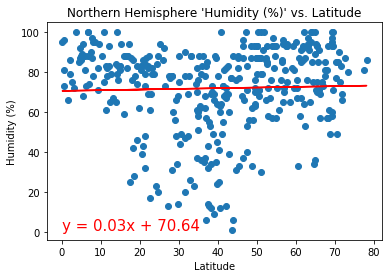

In [17]:
#Northern Hemisphere - Humidity (%) vs. Latitude


x_axis=Northern_Hemisphere.Lat
y_axis=Northern_Hemisphere['Humidity (%)']
plt.title("Northern Hemisphere 'Humidity (%)' vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

regresion(x_axis,y_axis,x_axis.min(),y_axis.min())
plt.savefig("../PNG_Images/Northern Hemisphere 'Humidity (%)' vs. Latitude.png")
plt.show()


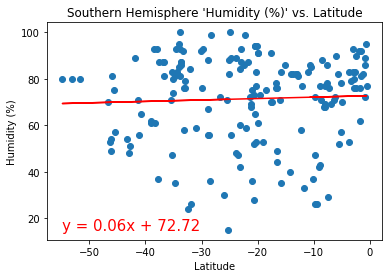

In [18]:
#Southern Hemisphere - Humidity (%) vs. Latitude
x_axis=Southern_Hemisphere.Lat
y_axis=Southern_Hemisphere['Humidity (%)']
plt.title("Southern Hemisphere 'Humidity (%)' vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

regresion(x_axis,y_axis,x_axis.min(),y_axis.min())
plt.savefig("../PNG_Images/Southern Hemisphere 'Humidity (%)' vs. Latitude.png")
plt.show()


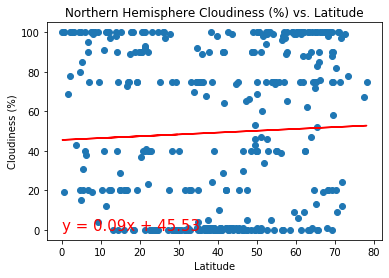

In [19]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
x_axis=Northern_Hemisphere.Lat
y_axis=Northern_Hemisphere['Cloudiness (%)']
plt.title("Northern Hemisphere Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')

regresion(x_axis,y_axis,x_axis.min(),y_axis.min())
plt.savefig("../PNG_Images/Northern Hemisphere Cloudiness (%) vs. Latitude.png")
plt.show()




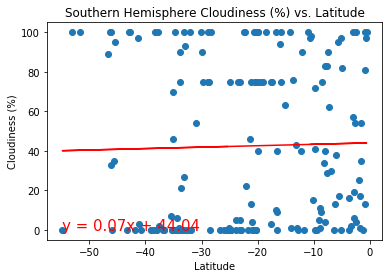

In [20]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
x_axis=Southern_Hemisphere.Lat
y_axis=Southern_Hemisphere['Cloudiness (%)']
plt.title("Southern Hemisphere Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')

regresion(x_axis,y_axis,x_axis.min(),y_axis.min())
plt.savefig("../PNG_Images/Southern Hemisphere Cloudiness (%) vs. Latitude.png")
plt.show()



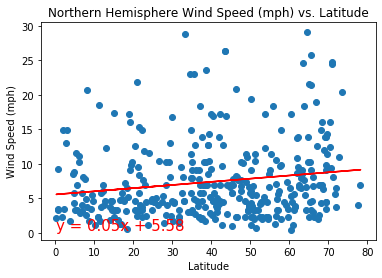

In [21]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_axis=Northern_Hemisphere.Lat
y_axis=Northern_Hemisphere['Wind Speed (mph)']
plt.title("Northern Hemisphere Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')

regresion(x_axis,y_axis,x_axis.min(),y_axis.min())
plt.savefig("../PNG_Images/Northern Hemisphere Wind Speed (mph) vs. Latitude.png")
plt.show()



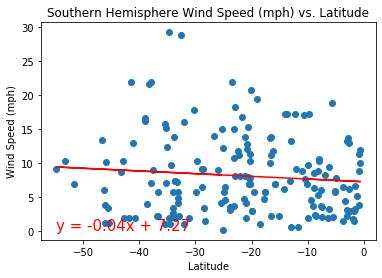

In [22]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_axis=Southern_Hemisphere.Lat
y_axis=Southern_Hemisphere['Wind Speed (mph)']
plt.title("Southern Hemisphere Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')

regresion(x_axis,y_axis,x_axis.min(),y_axis.min())
plt.savefig("../PNG_Images/Southern Hemisphere Wind Speed (mph) vs. Latitude.png")
plt.show()




Final Conclusion:
1) Cities that are closer to Ecuador have warmer temperatures.
2) Coordenates of latitude and lognitude does not have any relation with wind speed or humidity.